In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
NUM_TRIALS = 100000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [4]:
class Bandit:
  def __init__(self, p):
    # p: the win rate
    self.p = p
    self.p_estimate = 0.
    self.N = 0. # num samples collected so far

  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p

  def update(self, x):
    self.N += 1.
    self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N

In [9]:
def ucb(mean, n, nj):
    ubj = mean + np.sqrt(2*np.log(n)/nj)
    return ubj

In [13]:
bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
rewards = np.empty(NUM_TRIALS)
total_plays = 0

# initialization: play each bandit once
for j in range(len(bandits)):
    x = bandits[j].pull()
    total_plays += 1
    bandits[j].update(x)

for i in range(NUM_TRIALS):
    j = np.argmax([ucb(b.p_estimate, total_plays, b.N) for b in bandits])
    x = bandits[j].pull()
    total_plays += 1
    bandits[j].update(x)

    # for the plot
    rewards[i] = x
    
cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)

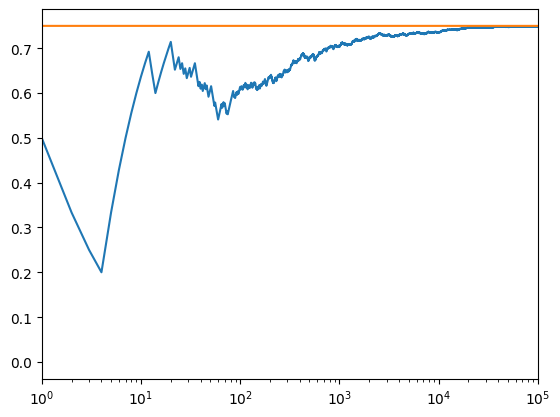

In [19]:
# plot moving average ctr
plt.plot(cumulative_average)
plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
plt.xscale('log')
plt.xlim([1,NUM_TRIALS])
plt.show()

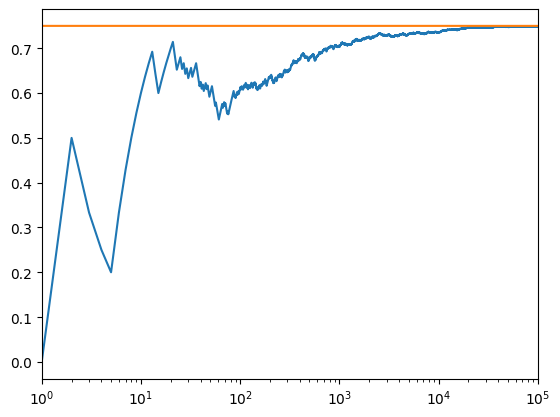

In [15]:
plt.plot(np.arange(NUM_TRIALS)+1, cumulative_average)
plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
plt.xscale('log')
plt.xlim([1,NUM_TRIALS])
plt.show()

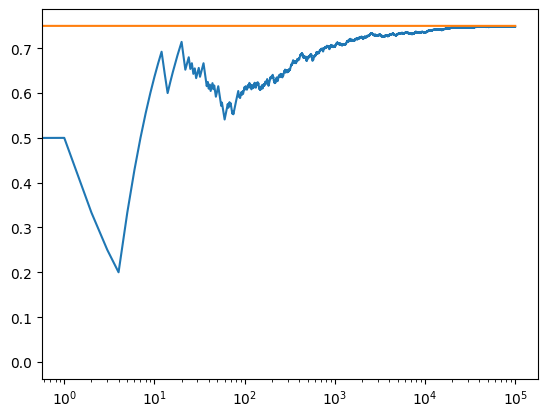

In [17]:
# plot moving average ctr
plt.plot(cumulative_average)
plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
plt.xscale('log')
plt.show() # does not show cumulative_average[0] in the xscale('log') case

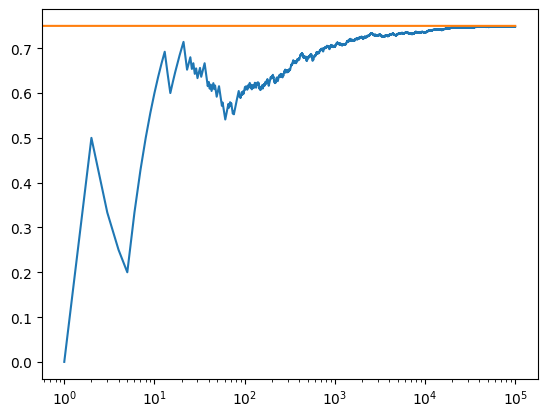

In [18]:
plt.plot(np.arange(NUM_TRIALS)+1, cumulative_average)
plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
plt.xscale('log')
plt.show()

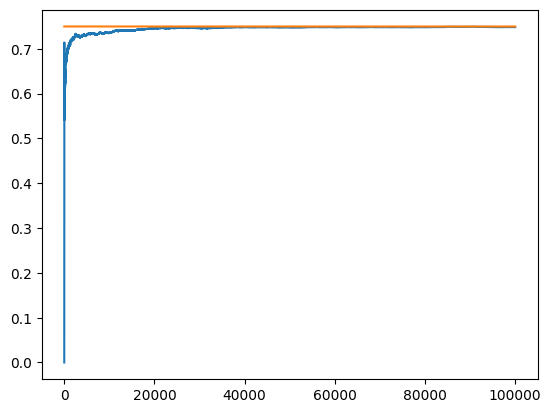

In [20]:
# plot moving average ctr linear
plt.plot(cumulative_average)
plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
plt.show()

In [21]:
for b in bandits:
    print(b.p_estimate)

print("total reward earned:", rewards.sum())
print("overall win rate:", rewards.sum() / NUM_TRIALS)
print("num times selected each bandit:", [b.N for b in bandits])

0.14754098360655737
0.5111731843575414
0.7497790809768722
total reward earned: 74856.0
overall win rate: 0.74856
num times selected each bandit: [61.0, 358.0, 99584.0]
